In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('/work/datalatih_baru.csv')

In [3]:
data.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,...,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,30.786345,24.553815,27.122892,37.082430,24.613353,29.540562,23.883032,83.031024,10.141064,14.633845,...,15.805120,176.985843,1010.416667,75.380422,16.800402,222.854116,19.238052,7.986948,20.622490,0.486315
std,1.433299,1.147265,1.060415,3.091786,1.347080,2.346665,1.113789,3.137376,22.944768,14.452051,...,4.690429,71.490087,1.729479,17.543821,3.033773,49.728272,4.297961,1.395913,11.969982,0.288445
min,26.200000,19.800000,23.800000,26.200000,19.800000,24.100000,18.800000,67.500000,0.000000,0.000000,...,5.400000,6.900000,1005.800000,23.700000,5.900000,10.000000,1.000000,1.000000,10.000000,0.000000
25%,29.700000,23.900000,26.300000,34.875000,23.900000,27.700000,23.100000,81.200000,0.600000,4.170000,...,12.600000,122.525000,1009.200000,63.050000,15.900000,196.475000,17.000000,7.000000,10.000000,0.250000
50%,30.900000,24.600000,27.200000,37.400000,24.600000,29.300000,24.000000,83.300000,2.250000,8.330000,...,14.800000,134.950000,1010.400000,79.000000,17.800000,227.800000,19.650000,8.000000,10.000000,0.500000
75%,31.900000,25.400000,27.900000,39.200000,25.400000,31.100000,24.700000,85.100000,9.000000,20.830000,...,18.400000,260.725000,1011.525000,89.925000,18.800000,255.225000,22.000000,9.000000,30.000000,0.750000
max,35.500000,27.400000,30.100000,47.900000,31.200000,36.300000,26.400000,94.900000,356.800000,95.830000,...,44.600000,357.400000,1016.500000,100.000000,24.100000,354.900000,30.900000,10.000000,75.000000,0.980000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              996 non-null    object 
 1   datetime          996 non-null    object 
 2   tempmax           996 non-null    float64
 3   tempmin           996 non-null    float64
 4   temp              996 non-null    float64
 5   feelslikemax      996 non-null    float64
 6   feelslikemin      996 non-null    float64
 7   feelslike         996 non-null    float64
 8   dew               996 non-null    float64
 9   humidity          996 non-null    float64
 10  precip            996 non-null    float64
 11  precipprob        996 non-null    bool   
 12  precipcover       996 non-null    float64
 13  preciptype        996 non-null    object 
 14  snow              996 non-null    float64
 15  snowdepth         996 non-null    float64
 16  windgust          996 non-null    float64
 1

In [5]:
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon
0,"Kebumen, Indonesia",2022-01-10,30.7,25.2,27.7,36.6,25.2,31.0,24.2,81.2,...,249.9,21.8,9.0,30.0,1641792752,1641837887,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain
1,"Kebumen, Indonesia",2022-01-11,32.2,23.7,26.6,40.2,23.7,28.2,23.3,82.4,...,214.0,18.4,7.0,30.0,1641879182,1641924305,0.28,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain
2,"Kebumen, Indonesia",2022-01-12,29.9,23.8,26.2,35.6,23.8,27.4,22.8,82.5,...,247.1,21.6,7.0,30.0,1641965612,1642010722,0.31,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain
3,"Kebumen, Indonesia",2022-01-13,30.3,23.8,25.9,35.3,23.8,27.0,23.1,85.1,...,183.7,15.8,7.0,30.0,1642052041,1642097139,0.34,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain
4,"Kebumen, Indonesia",2022-01-14,32.2,24.4,26.6,38.6,24.4,28.1,22.8,80.3,...,156.5,13.8,7.0,30.0,1642138470,1642183554,0.38,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,182.6,15.6,6.0,10.0,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
992,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,96.5,8.1,6.0,30.0,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
993,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,39.8,3.4,2.0,10.0,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
994,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,298.1,25.8,10.0,10.0,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain


In [6]:
data.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
dtype: int64

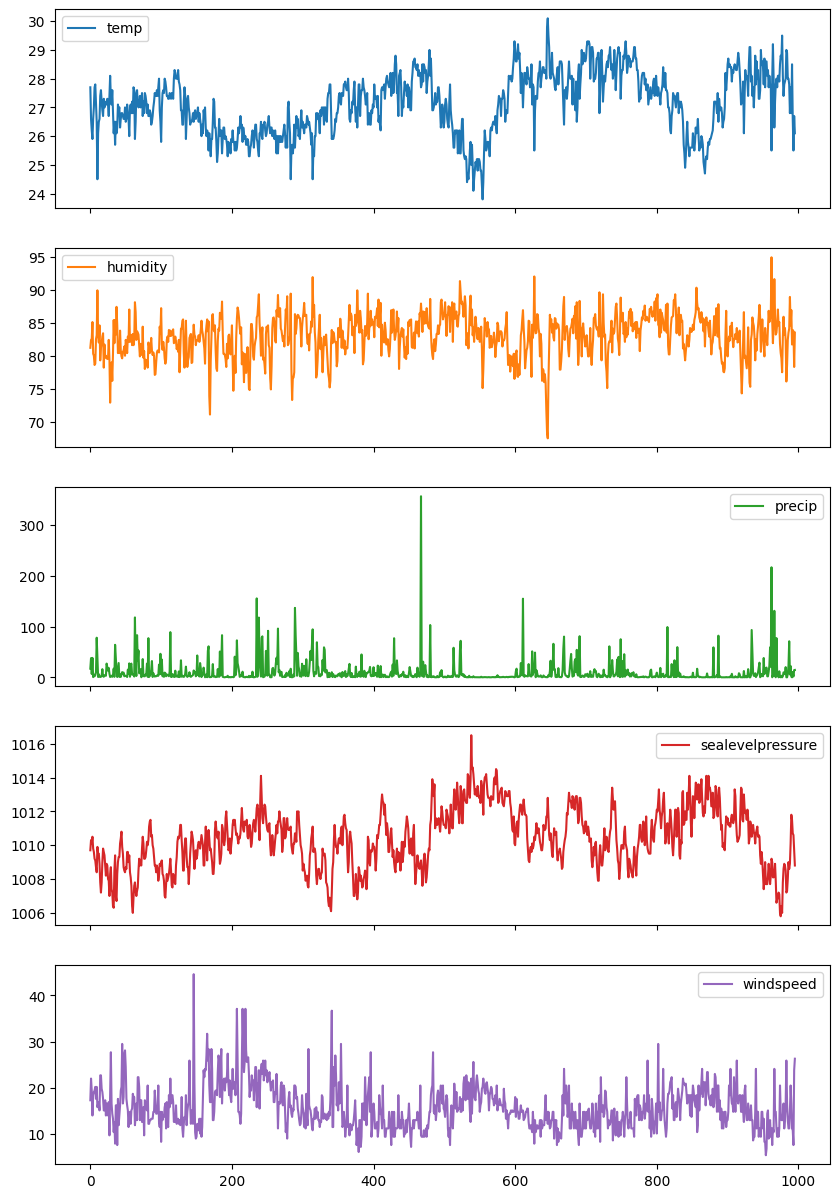

In [7]:
data.plot(y=['temp', 'humidity','precip','sealevelpressure','windspeed'], subplots=True, figsize=(10, 15))
plt.show()

In [8]:
data3.dropna(inplace=True)

NameError: name 'data3' is not defined

In [14]:
# Membagi variabel independen dan target
X = data[[
    'temp', 
    'tempmax',
    'tempmin',
    'humidity',
    'sealevelpressure', 
    'windspeed',
    'winddir'
    ]]  # Variabel independen
y = data['precipprob']  # Target (Curah Hujan)

In [15]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Daftar model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluasi semua model dan menyimpan hasil dalam bentuk tabel
results = []
for name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-Score (macro avg)': report['macro avg']['f1-score']
    })

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)

/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                       Model  Accuracy  Precision (macro avg)  \

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>